In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.utils import resample 
import pandas as pd
import numpy as np
import os, random
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import pickle 

In [31]:
#read in the case table
fpath = os.path.join("data", "casetable.psv")
df = pd.read_csv(fpath, sep = "|", low_memory=False)
df_census = pd.read_csv(os.path.join("data", "census2017.csv"))

df = pd.merge(df, census, left_on='Zipcode', right_on='ZipCode')

plt.hist(df['Assessed Value'], density=True, bins=30)

NameError: name 'census' is not defined

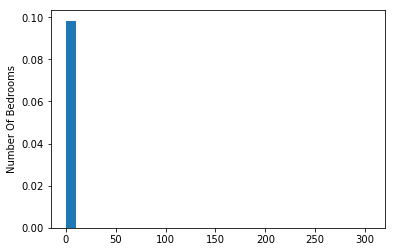

In [32]:
plt.ylabel('AssessedValue')

plt.hist(df['Number Of Bedrooms'], density=True, bins=30)
plt.ylabel('Number Of Bedrooms')

df = df[df['Assessed Value']<1000000]
df = df[df['Number Of Bedrooms']<10]
df.fillna(-999,inplace = True)

y = df['Assessed Value']

#TODO: Specify the features of the model instead of dropping fields

df.drop(['Parcel Number','Section','Township','Total Market Value',
         'Assessed Value','Total Just Value', 'Site Address Number',
         'Site Address Street Name','Site Address Street Type',
         'Site Address Unit Number','Site Address City','Building Number',
         'Exemption Code','Site Zip Code',
         'Amenity Item Code', "building value", "building type code", "Number Of Stories"], axis = 1, 
         inplace = True)

In [33]:
def split(df, pct=.7):
    tr, xv = [], []
     
    indices = [x for x in df.index]
    random.shuffle(indices)
 
    for ind in indices:
        if np.random.rand() <= pct:
            tr.append(ind)
        else:
            xv.append(ind)
 
    return tr, xv

In [34]:
tr_indices, xv_indices = split(df)

features_tr = df.loc[tr_indices, :]
features_xval = df.loc[xv_indices, :]
y_tr = y.loc[tr_indices]
y_xval = y.loc[xv_indices]

In [35]:
for col in df.columns.values:
    print(col, df[col].unique())

Zipcode [173171.  78918. 261185. ... 616615. 494037. 148350.]
doc acres [ 2503  2610  2495 ... 14539 14528 14348]
building type name [1 8 3]
building style code [4 3 2 5 1]
building class code [3 2 1 4 5 6]
quality code [1980 1955 1941 1967 1989 1991 1996 2000 1939 1973 1985 1961 1974 1992
 2001 1968 1931 1983 1958 1975 1987 1953 1963 1998 1924 1966 1979 2008
 1969 2004 1960 1943 1952 1948 1921 1908 1926 1971 2006 1914 2015 2016
 2003 1984 1937 1981 1977 1962 1954 1949 1957 1930 1936 1942 1990 1972
 1944 1934 1946 2011 2005 1959 1925 1950 1964 1956 1965 1993 1999 1995
 1976 2007 1988 2013 1920 2002 2010 1994 2012 2009 1911 1922 1970 1865
 1945 1986 1940 2018 1947 1951 1935 1978 2014 1982 2017 1997 1928 1933
 1915 1929 1932 1919 1909 1896 1918 1927 1938 1923 1910 1916 1917 1904
 1905 1912 1907 1913 1906 1899 1901 1900 1903 1898 1887 1902 1897 1892
 1894 1854 1884 1888 1880 1882 1872 1848 1877]
actual year built [1980 1955 1941 1967 1989 1991 1996 2000 1939 1990 1985 1961 1974 1992
 2001

In [37]:
#create split function
random.seed(19860406)
np.random.seed(19860406)

rfc = RandomForestRegressor(
        max_depth = 5, 
        n_estimators = 25, 
        min_samples_leaf = 15)

rfc.fit(features_tr, y_tr.values.ravel())

tr_yhat2 = rfc.predict(features_tr)
xval_yhat2 = rfc.predict(features_xval)

tr_MSE = metrics.mean_squared_error(y_tr, tr_yhat2)
xval_MSE = metrics.mean_squared_error(y_xval, xval_yhat2)

print('tr MSE {} xval MSE {}'.format(tr_MSE, xval_MSE))


tr MSE 48005502.7673715 xval MSE 54165072.24988032


In [38]:
with open(os.path.join(".model", 'model.pckl'), 'wb') as f:
   pickle.dump(rfc, f,  pickle.HIGHEST_PROTOCOL)